# Семинар №1

# **Работа с растровыми изображенями**
**Растровое изображение** $-$ изображение, представляющее собой сетку пикселей — цветных точек. 
Важными характеристиками изображения являются: размер, глубина цвета и цветовое пространство.

<img src="img/RGB_cube.png" alt="Drawing" style="width: 300px;"/>

Самый распространённый способ выделить объект $-$ это цвет.

**Цвет** $-$ это свойство тел отражать или испускать видимое излучение определенного спектрального состава и интенсивности.

Трихроматическая теория (сетчатка глаза имеет 3 вида рецепторов света, ответственных за цветное зрение) полагает, что достаточно всего трёх чисел, чтобы описать цвет (красный, синий, зелёный). Т.е. используя три значения **R, G, B**  

Цветовые пространства бывают линейные и нелинейные.
К линейным относится **RGB**. Изучим его подробней.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
# отображение графиков в ноутбуке
%matplotlib inline

In [8]:
# считаем изображение
image = cv2.imread('img/RGB_cube.png')

In [9]:
# посмотрим, какой тип объекта 
type(image), image.dtype

(numpy.ndarray, dtype('uint8'))

In [10]:
# размерность
image.shape

(457, 640, 3)

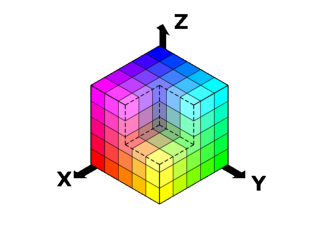

In [11]:
# преобразуем RGB в BGR для корректного отображения
# это необходимо из-за особенностей matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# отобразим объект
plt.imshow(image)
plt.axis('off');

## Grayscale

**Grayscale** - цветовой режим изображений, которые отображаются в оттенках серого цвета, размещённые в виде таблицы в качестве эталонов яркости белого цвета.

В компьютерном представлении широко распространённая серая шкала использует на каждый пиксел изображения один байт ($8$ бит) информации. Такая шкала передаёт $256$ оттенков (градаций) серого цвета, или яркости (значение $0$ представляет чёрный цвет, а значение $255$ $-$ белый).

<img src="img/grad_grayscale.png" alt="Drawing" style="width: 200px;"/>

Преобразование цветного изображения в оттенки серого из **RGB** пересчитывают по формуле:

\begin{align}
\ Y' & = 0.2126R + 0.7152G + 0.0722B \\
\end{align}

В **OpenCV_** сменить цветовой режим изображения можно с помощью функции **cv2.cvtColor(img, code)**

* **img** $-$ исходное изображение
* **code** $-$ кодировка для смены цвета. 

Все кодировки есть в [документации](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). В рамках занятий мы рассмотрим лишь их часть.

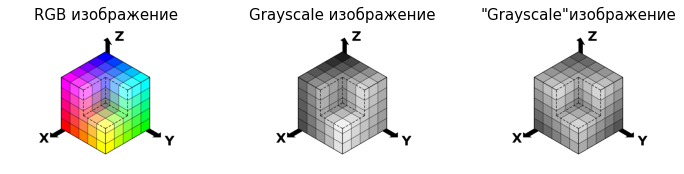

In [15]:
# создадим grayscale изображение с помощью openCV
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_image_0 = np.mean(image, axis=2)

fig, axs = plt.subplots(1, 3, figsize = (12, 8))
ax1, ax2, ax3 = axs

ax1.set_title('RGB изображение', fontsize=15)
ax1.imshow(image)
ax2.set_title('Grayscale изображение', fontsize=15)
ax2.imshow(gray_image, cmap='gray')
ax3.set_title(r'"Grayscale"изображение', fontsize=15)
ax3.imshow(gray_image_0, cmap='gray')


axs = [ax.axis('off') for ax in axs.flatten()]

### Поиграемся с каналами
Выделим каналы изображения. Они представимы как массивы чисел, поэтому не составит труда их разделить из исходного изобрадения. Посмоторим на картинку, где есть только красный, зеленый и синий.

In [16]:
# R scale
r = image[:, :, 0].copy()
r[(r >= 30) & (r <= 250)] = 0

# G scale
g = image[:, :, 1].copy()
g[(g >= 150) & (g <= 250)] = 0

# B scale
b = image[:, :, 2].copy()
b[(b >= 250) & (b <= 255)] = 0

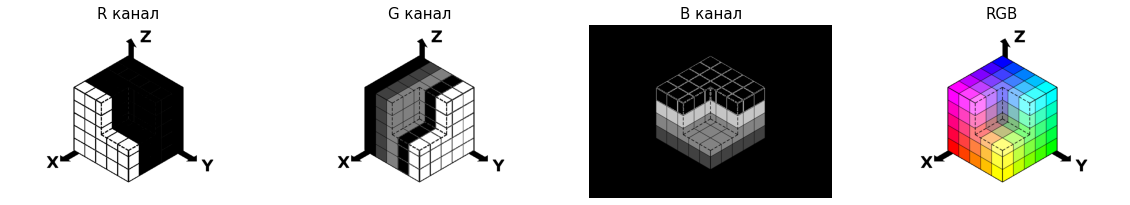

In [17]:
## посмотрим на результат
fig, axs = plt.subplots(1, 4, figsize = (20, 9))
ax1, ax2, ax3, ax4 = axs

ax1.set_title('R канал', fontsize=15)
ax1.imshow(r, cmap='gray')
ax2.set_title('G канал', fontsize=15)
ax2.imshow(g, cmap='gray')
ax3.set_title('B канал', fontsize=15)
ax3.imshow(b, cmap='gray')
ax4.set_title('RGB', fontsize=15)
ax4.imshow(image)

axs = [ax.axis('off') for ax in axs.flatten()]

***Контрольные вопросы:***

1. Почему так получилось?

Давайте изменим конфигурацию каналов, чтобы посмотреть на изменения.

In [18]:
tr_val = 155  # пороговое значение

# R scale
r = image[:, :, 2].copy()
r[r < tr_val] = 0

# G scale
g = image[:, :, 1].copy()
g[g < tr_val] = 0

# B scale
b = image[:, :, 0].copy()
b[b < tr_val] = 0

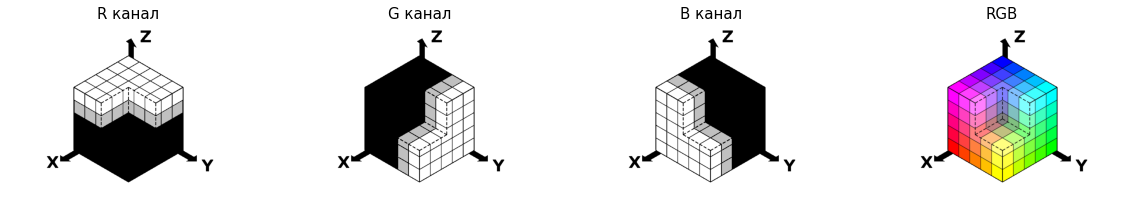

In [19]:
## посмотрим на результат
fig, axs = plt.subplots(1, 4, figsize = (20, 9))
ax1, ax2, ax3, ax4 = axs

ax1.set_title('R канал', fontsize=15)
ax1.imshow(r, cmap='gray')
ax2.set_title('G канал', fontsize=15)
ax2.imshow(g, cmap='gray')
ax3.set_title('B канал', fontsize=15)
ax3.imshow(b, cmap='gray')
ax4.set_title('RGB', fontsize=15)
ax4.imshow(image)

axs = [ax.axis('off') for ax in axs.flatten()]

### ***Контрольные вопросы:***

1. Какой вывод можно сделать из этих примеров?

2. Чем неудобна **RGB** кодировка цвета?

## Поиск по цвету

Бывают задачи, в которых отличительной особенностью предмета являтются его цветовые признаки. Рассмотрим пример:

<img src="img/cat.jpg" alt="Drawing" style="width: 400px;"/>

Как мы можем в этом найти кота? Для начала мы можем оценить глазами, что цвет кота отличается от цвета окружения – он ярко рыжий и отлично виден в траве. Как мы можем выделить этот цвет в OpenCV? Для этого существует специальная функция ```cv2.inRange(image, low_color, max_color)```, она принимает на вход изображение и диапазон цвета, который мы хотим выделить. **На выходе мы получаем черно-белое изображение**, где белым выделены пиксели, цвета которых попадали в диапазон, а черным $-$ все другое. Дальше мы попробуем найти кота.

### Найди кота

Теперь попробуем найти кота на изображении с помощью реализованного поиска цвета выше. Одако вот так искать цвет для конкретного объекта в цветом пространстве RGB трудно. Рассмотрим пример для наглядности.

In [20]:
# посмторим на кота

cat_image  = cv2.imread('img/cat.jpg')

while True:
    cv2.imshow('cat', cat_image)
    
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
        
cv2.destroyAllWindows()

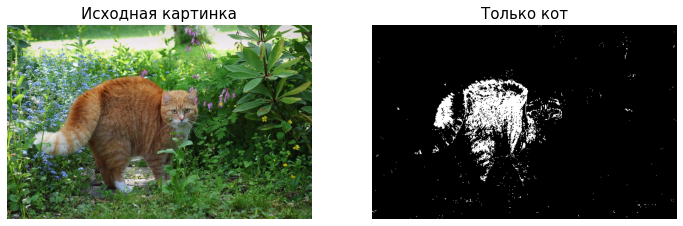

In [21]:
cat_image  = cv2.imread('img/cat.jpg')

# значения цвета можно посмотреть в gimp или paint
pix = 256
low_red = (0.0 * pix, 0.11 * pix, 0.37 * pix)
high_red = (0.35 * pix, 0.4 * pix, 0.99 * pix)

cat_area = cv2.inRange(cat_image, low_red, high_red)

# посмотрим на результат
fig, m_axs = plt.subplots(1, 2, figsize = (12, 9))
ax1, ax2 = m_axs

ax1.set_title('Исходная картинка', fontsize=15)
cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)  # преобразуем цвет для plt
ax1.imshow(cat_image, cmap='gray')
ax1.axis('off')

ax2.set_title('Только кот', fontsize=15)
ax2.imshow(cat_area, cmap='gray')
ax2.axis('off');

**Кот в RGB $-$ не кот. Выбираем цветовое пространство.**

С данным изображением мы уже можем работать, но что-то в нем не то. Кот выделен не целиком, и есть много лишних точек. На самом деле, мы научимся даже из такого получать много полезной информации, но в данный момент мы сделаем одно очень важное и правильное улучшение. Как вы могли заметить $-$ мы работаем с изображением в пространстве **RGB**. У данного пространства, кроме не очевидной для человеческого восприятия записи цвета, есть еще один недостаток в нашем случае. Чтобы его понять, рассмотрим что из себя представляет **RGB**:

<img src="img/RGB_cube_scheme.png" alt="Drawing" style="width: 300px;"/>

Пространство представляет из себя куб с длинной стороны $256$, где любой цвет задается координатами соответствующей точки на данном кубе. Данная концепция получила широкое распространение из-за того, что в случае формирования цвета на экране устройства, такого как телефон или монитор компьютера, изображение формируется за счет точек трех цветов $-$ синего, зеленого, и красного. Теперь перейдем к нашей функции ```cv2.inRange()```. Она принимает набор из двух цветов – точек на данном кубе. Что в таком случае мы будем считать за цвет, который удовлетворяет нашим критериям? Для ответа на данный вопрос нарисуем схематично тот же самый куб RGB:

<img src="img/RGB_scheme.png" alt="Drawing" style="width: 300px;"/>

На данной схеме становится понятно, что пространство между двумя заданными точками цвета также является кубом RGB. Таким образом, наша функция находит вложенный цветовой куб в полном кубе RGB. Кроме того, что это может непонятно звучать, это и работает не самым лучшим образом: представим что мы хотим найти оттенки пурпурного цвета, в таком случае мы размещаем наш вложенный куб как можно ближе к пурпурному. Но при таком размещении, мы так или иначе затрагиваем все остальные цвета, из-за того, что стороны куба параллельны основному. Как в таком случае поступить?

Мы не первые,кто сталкивается с такой задачей и такой проблемой. И одно из существующих решений $-$ переход в другое цветовое пространство. Если поставить задачей, что во главе угла у нас фиксируется оттенок цвета или соотношение между RGB, то мы приходим к следующей схеме:

<img src="img/RGB_HSV_trans.png" alt="Drawing" style="width: 200px;"/>

В данной модели мы переходим к следующим координатам $-$ **оттенок, насыщенность и значение**. Именно в данных понятиях люди обычно описывают цвета. 

Под цветовым тоном (**Hue**) имеют в виду именно цвет (длину волны). 

Насыщенность (**Saturation**) характеризует близость цвета к белому (розовый ближе к белому чем красный). 

Значение (**Value**) описывается всех сложнее и в модели HS ее можно описать как общую яркость точки или цвета.

Все серые цвета (лежащие на диагонали куба) при этом проецируются в центральную точку. Чтобы с помощью этой модели можно было закодировать все цвета, доступные в RGB-модели, необходимо добавить вертикальную ось яркости (или интенсивности) (I). В итоге получается:

<img src="img/HSV.png" alt="Drawing" style="width: 400px;"/>

В OpenCV диапазоны разные. S, V находятся в $[0,255]$, а H – в $[0,180]$. Обычно H находится в диапазоне $[0,360]$ (полный круг), но для того, чтобы поместиться в байте ($256$ различных значений), его значение уменьшается вдвое.

В пространстве HSV проще отделить один цвет, так как вы можете просто установить правильный диапазон для H и просто позаботиться о том, чтобы S не был слишком маленьким (он будет почти белым), а V не слишком мал (это будет темно).

Например, если вам нужны почти синие цвета, вам нужно, чтобы H находилось вокруг значения $120$ (например, в $[110,130]$), а S, V не слишком мало (скажем, в $[100, 255]$).

Белый цвет не является оттенком (радуга не имеет белого цвета в нем), но представляет собой комбинацию цвета.

В HSV вам нужно взять весь диапазон H (H в $[0, 180]$), очень малые значения S (например, S в $[0, 25]$) и очень высокие значения V (например, V в $[230, 255]$). Это в основном соответствует верхней части центральной оси конуса.

В данном конусе диапазон выбранных цветов будет представлять из себя конический слой. Его главные для нас атрибуты: он лежит по оттенку в заданных пределах, в отличии от RGB, его светлота и интенсивность также определяются просто и очевидно в описании цветового предела. Благодаря таким удобным и полезным свойствам данное цветовое пространство заслужило большую любовь как среди дизайнеров, так и особенно среди общества разработчиков компьютерного зрения. 

В OpenCV данное цветовое пространство имеет обозначение **HSV**. Переведем наше изображение в него и снова найдем котейку:

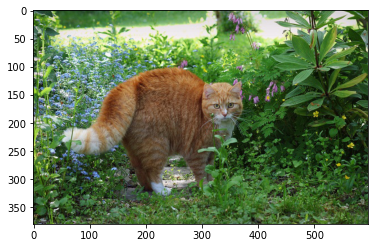

In [23]:
plt.imshow(cat_image)
plt.show()

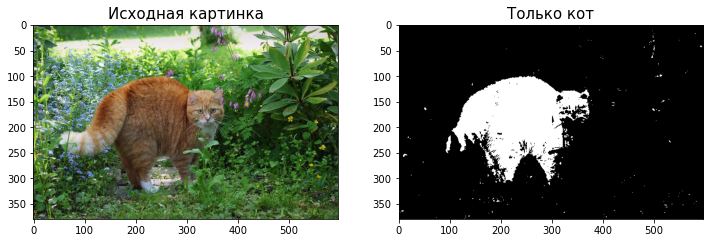

In [24]:
# меняем цветовое пространство
cat_image_hsv = cv2.cvtColor(cat_image, cv2.COLOR_RGB2HSV)

# осталось только подобрать нужные цвета 
# воспользуйтесь функциями, которые реализовали выше
hsv_low = (0.0 * 360, 60, 60)
hsv_high = (0.06 * 360, 250, 255)

cat_area = cv2.inRange(cat_image_hsv, hsv_low, hsv_high)

## посмотрим на результат
fig, m_axs = plt.subplots(1, 2, figsize = (12, 9))
ax1, ax2 = m_axs

ax1.set_title('Исходная картинка', fontsize=15)
ax1.imshow(cat_image, cmap='gray')
ax2.set_title('Только кот', fontsize=15)
ax2.imshow(cat_area, cmap='gray');

In [40]:
only_cat = np.zeros_like(cat_image)
cat_area = cat_area / cat_area.max()

for dim in range(3):
    # only_cat[:, :, dim]
    only_cat[..., dim] = cat_image[..., dim] * cat_area

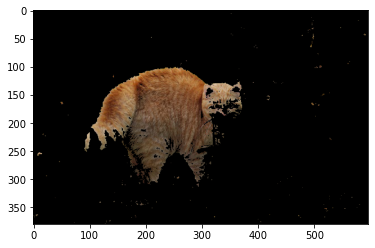

In [41]:
plt.imshow(only_cat)
plt.show()

(380, 596, 3)


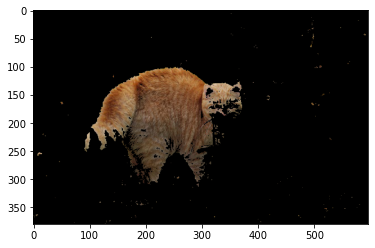

In [52]:
y, x = np.argwhere(cat_area == 1).T

only_cat = np.zeros_like(cat_image)

only_cat[y, x] = cat_image[y, x]
print(only_cat.shape)

plt.imshow(only_cat)
plt.show()

Тут я лишь остановлюсь на моменте выбора цвета, в данном примере мы руководствовались лишь собственным глазом и оценкой того, какой цвет мы хотим найти. Этим **HSV** замечательно отличается от **RGB**, в которой нам необходимо каждый цвет искать в справочнике или использовать сторонние программы.

# **Геометрические преобразования изображений**

Теперь мы рассмотрим каким образом аффинные преобразования помогут нам изменять изображения с помощью OpenCV.


## Однородные координаты

А что же делать? Колдовать! Представьте теперь, что я допишу руками одну строчку и один столбец к нашей матрице преобразования и добавлю третью координату, которая равна единице у вектора, который мы преобразовываем:

$$
{\begin{pmatrix} a && b && e\\ c && d && f\\ 0 && 0 && 1 \end{pmatrix} \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} = \begin{pmatrix} ax + by + e \\ cx + dy + f \\ 1 \end{pmatrix}}
$$

При умножении этой 3x3 матрицы и нашего вектора, дополненного единицей, мы снова получили вектор с единицей в третьей компоненте, а остальные две имеют ровно тот вид, который мы хотели! Колдунство.


## Сдвиг изображения
**Сдвиг** $-$ это смещение местоположения объекта. Если вам известно смещение в направлении $(x,y)$, пусть оно будет $(tx,ty)$, вы можете создать матрицу преобразования $M$ следующим образом:

$$
\ M = \begin{pmatrix}
1 & \ 0 & \ t_x \\ 
0 & \ 1 & \ t_y \\  
\end{pmatrix}
$$

Затем вы можете взять массив Numpy типа np.float32 и передать его в функцию **cv2.warpAffine()**. Ниже приведен пример сдвига:

Раземер исходного изображения: (457, 640, 3)


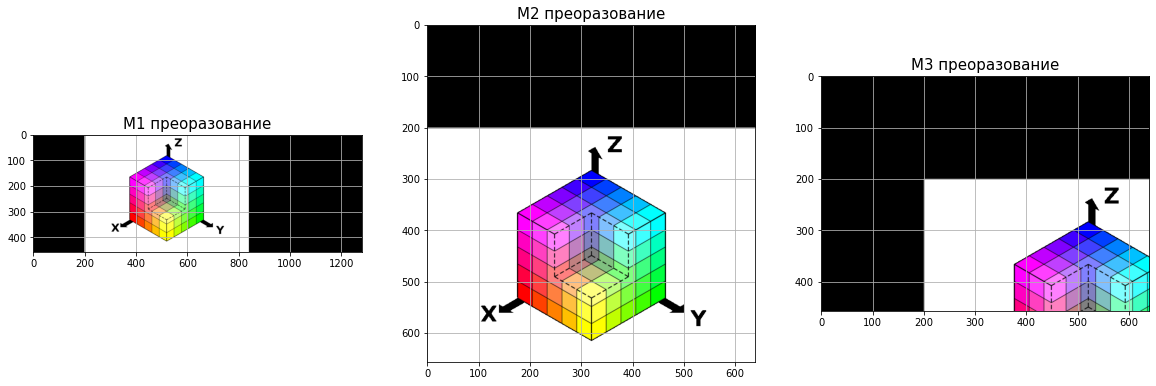

In [56]:
# сдвиг изображения

image  = cv2.imread('img/RGB_cube.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## посмотрим на размер изображения
print('Раземер исходного изображения:', image.shape)
y, x, _ = image.shape

## матрица афинного преобразования
M1 = np.float32([[1, 0, 200], [0, 1, 0]])
M2 = np.float32([[1, 0, 0], [0, 1, 200]])
M3 = np.float32([[1, 0, 200], [0, 1, 200]])

## визуализация
fig, m_axs = plt.subplots(1, 3, figsize=(20,8))
ax1, ax2, ax3 = m_axs

dst1 = cv2.warpAffine(image.copy(), M1, (x * 2, y))
ax1.imshow(dst1)
ax1.grid()
ax1.set_title('M1 преоразование', fontsize=15)

dst2 = cv2.warpAffine(image.copy(), M2, (x, y + 200))
ax2.imshow(dst2)
ax2.grid()
ax2.set_title('M2 преоразование', fontsize=15)

dst3 = cv2.warpAffine(image.copy(), M3, (x, y))
ax3.imshow(dst3)
ax3.grid()
ax3.set_title('M3 преоразование', fontsize=15);

## Поворот изображения
Поворот изображения на угол $\theta$ достигается путем преобразования матрицы вида:

$$
\ M = \begin{pmatrix}
\cos(\theta) & \ -\sin(\theta) \\ 
\sin(\theta) & \ \cos(\theta) \\  
\end{pmatrix}
$$

Но OpenCV обеспечивает масштабированное вращение с регулируемым центром вращения, так что вы можете вращаться в любом месте, которое вы предпочитаете. Модифицированная матрица преобразования задается:

$$
\ M = \begin{pmatrix}
\alpha & \ -\beta & \ (1-\alpha)\cdot center.x - \beta \cdot center.y \\ 
\beta & \ \alpha & \ \beta \cdot center/x + (1-\alpha) \cdot center.y \\  
\end{pmatrix}
$$

где: 

$$
\alpha = scale \cdot \cos(\theta) \\
\beta = scale \cdot \sin(\theta) \\ 
$$ 

Результатом поворота является:

$$
\begin{pmatrix} \ x' \\ \ y' \\ \end{pmatrix} = 
\begin{pmatrix}
\alpha & \ -\beta & \ (1-\alpha)\cdot center.x - \beta \cdot center.y \\ 
\beta & \ \alpha & \ \beta \cdot center/x + (1-\alpha) \cdot center.y \\ 
\end{pmatrix} \cdot 
\begin{pmatrix} \ x \\ \ y \\ 1 \\ \end{pmatrix}
$$

где:

$$
\ (x', y') - \ new \ coordinates \\
\ (x, y) - \ old \ coordinates \\ 
$$
Чтобы найти эту матрицу преобразования, OpenCV предоставляет функцию **cv2.getRotationMatrix2D()**. Ниже приведены несколько примеров.

Раземер исходного изображения: (457, 640, 3)
[[ 0.90630779  0.42261826  0.        ]
 [-0.42261826  0.90630779  0.        ]]


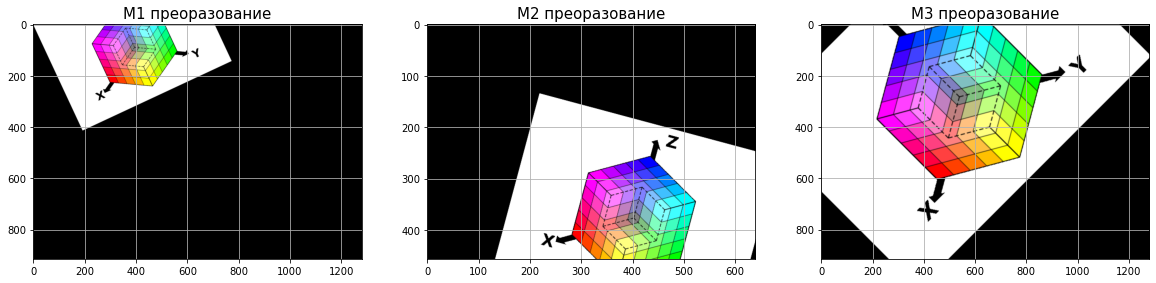

In [57]:
print('Раземер исходного изображения:', image.shape)
rows, cols, _ = image.shape

M1 = cv2.getRotationMatrix2D((0, 0), 25, scale=1.0)
M2 = cv2.getRotationMatrix2D((300, 700), -15, scale=0.75)
M3 = cv2.getRotationMatrix2D((300, 100), 45, scale=2.0)

print(M1)

## визуализация
fig, m_axs = plt.subplots(1, 3, figsize=(20, 8))
ax1, ax2, ax3 = m_axs

dst1 = cv2.warpAffine(image.copy(), M1, (cols * 2, rows * 2))
ax1.imshow(dst1)
ax1.grid()
ax1.set_title('M1 преоразование', fontsize=15)

dst2 = cv2.warpAffine(image.copy(), M2, (cols, rows))
ax2.imshow(dst2)
ax2.grid()
ax2.set_title('M2 преоразование', fontsize=15)

dst3 = cv2.warpAffine(image.copy(), M3, (cols * 2, rows * 2))
ax3.imshow(dst3)
ax3.grid()
ax3.set_title('M3 преоразование', fontsize=15);

### ***Контрольные вопросы:***

Как сделать поворот изображения без обрезания краев? 

## Трансформация точек
При аффинном преобразовании все параллельные линии в исходном изображении все еще будут параллельны в выходном изображении. Чтобы найти матрицу преобразования, нам нужны три точки из входного изображения и их соответствующие местоположения в выходном изображении. Затем **cv2.getAffineTransform()** создаст матрицу $2\times 3$, которая должна быть передана в **cv2.warpAffine()**.

Раземер исходного изображения: (457, 640, 3)
Матрица перехода: 
[[ 0.28571429  0.         85.71428571]
 [-0.22857143  1.         61.42857143]]


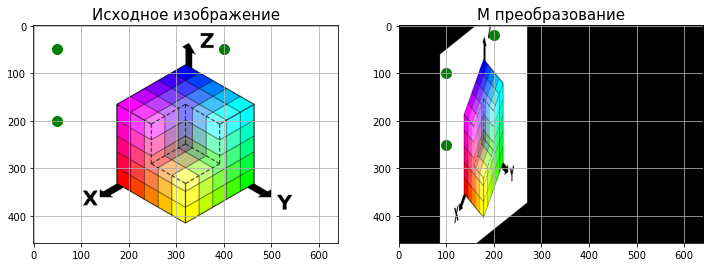

In [58]:
print('Раземер исходного изображения:', image.shape)
h, w, _ = image.shape

pts1 = np.float32([[50, 50], [400, 50], [50, 200]])
pts2 = np.float32([[100, 100], [200, 20], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2) 
print(f'Матрица перехода: \n{M}')

dst = cv2.warpAffine(image, M, (w, h))

fig, m_axs = plt.subplots(1, 2, figsize=(12, 8))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение', fontsize=15)
ax1.imshow(image)
ax1.grid()
ax1.scatter(*pts1.T, color='g', s=100)

ax2.set_title('M преобразование', fontsize=15)
ax2.imshow(dst)
ax2.grid()
ax2.scatter(*pts2.T, color='g', s=100);

## Перспектива

На самом деле, идея очень простая: параллельный перенос не является линейной операцией в двумерном пространстве.
Поэтому мы погружаем наше двумерное пространство в трёхмерное (добавив единицу в третью компоненту). Это означает, что наше двумерное пространство это плоскость z=1 внутри трёхмерного. Затем мы делаем линейное преобразование в трёхмерном пространстве и проецируем всё трехмерное пространство обратно на нашу физическую плоскость. Параллельный перенос от этого не стал линеен, но пайплайн всё же прост.



Как именно мы проецируем трёхмерное пространство обратно в нашу плоскость? Очень просто:

$$
{\begin{pmatrix} x \\ y \\ z\end{pmatrix} \rightarrow \begin{pmatrix} x/z \\ y/z \end{pmatrix}}
$$

Итак, если мы хотим построить центральную перспективу, находящейся на оси z на расстоянии c от начала координат, то сначала мы погружаем трёхмерные точки в четырёхмерное пространство, добавив 1. Затем умножаем на следующую матрицу и проецируем результат обратно в 3D:

$$
{\begin{pmatrix} x \\ y \\ z\end{pmatrix} \rightarrow \begin{pmatrix} x \\ y \\ z \\ 1\end{pmatrix}}
$$

$$
{\begin{pmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 1 && 0 \\ 0 && 0 && -1/c && 1\end{pmatrix} \begin{pmatrix} x \\ y \\ z \\ 1\end{pmatrix} = \begin{pmatrix} x \\ y \\ z \\ 1 - z/c\end{pmatrix}}
$$

$$
{\begin{pmatrix} x \\ y \\ z \\ 1 - z/c\end{pmatrix} \rightarrow \begin{pmatrix} \frac{x}{1-z/c} \\ \frac{y}{1-z/c} \\ \frac{z}{1-z/c}\end{pmatrix}}
$$



Для преобразования перспективы вам понадобится матрица преобразования $3\times3$. Прямые линии останутся прямыми даже после трансформации. Чтобы найти эту матрицу преобразования, вам нужно $4$ точки на входном изображении и соответствующие точки на выходном изображении. Среди этих $4$ точек $3$ из них не должны быть коллинеарными. Тогда матрица преобразования может быть найдена функцией **cv2.getPerspectiveTransform()**. Затем примените **cv2.warpPerspective()** с этой матрицей преобразования $3\times3$.

Раземер исходного изображения: (457, 640, 3)
[[ 1.09714286e+00  0.00000000e+00 -2.19428571e+02]
 [ 0.00000000e+00  6.52857143e-01 -6.52857143e+01]
 [-0.00000000e+00 -1.42857143e-03  1.00000000e+00]]


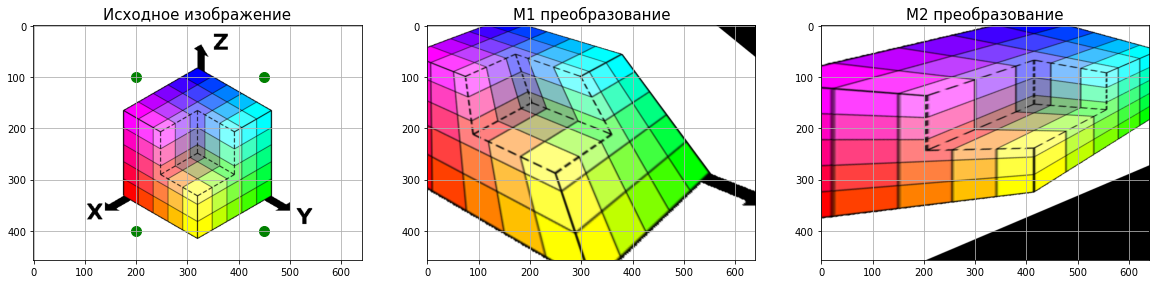

In [59]:
print('Раземер исходного изображения:', image.shape)
rows, cols, _ = image.shape

pts1 = np.float32([[200, 100], [450, 100],[200, 400], [450, 400]])
pts2 = np.float32([[0, 0],[cols/2, 0],[0, rows], [cols, rows]]) 
pts3 = np.float32([[0, 0],[cols, 0],[0, rows], [cols, rows/2]]) 

M1 = cv2.getPerspectiveTransform(pts1, pts2) 
M2 = cv2.getPerspectiveTransform(pts1, pts3) 

print(M1)

fig, m_axs = plt.subplots(1, 3, figsize=(20,8))
ax1, ax2, ax3 = m_axs

ax1.set_title('Исходное изображение', fontsize=15)
ax1.imshow(image)
ax1.grid()
ax1.scatter(*pts1.T, color='g', s=100)

ax2.set_title('M1 преобразование', fontsize=15)
dst2 = cv2.warpPerspective(image, M1, (cols, rows))
ax2.imshow(dst2)
ax2.grid()

ax3.set_title('M2 преобразование', fontsize=15)
dst3 = cv2.warpPerspective(image, M2, (cols, rows))
ax3.imshow(dst3)
ax3.grid();